<style>
div.cell, div.text_cell_render{
  max-width:850px;
  margin-left:auto;
  margin-right:auto;
  text-align: left important!;
}

.rendered_html
{
  font-size: 130%;
  }

.rendered_html li
{
  line-height: 1.;
  }

.rendered_html h1, h2 {
  font-familly:"Charis SIL", serif;
}

.rendered_html p {
  text-align: left;
}

img { 
    max-width: 200% !important;
    height: auto !important;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas, monospace;
  font-size: 120%;
}
</style>

In [8]:
# make figures better:
font = {'weight':'normal','size':20}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(9.0, 6.0))
matplotlib.rc('xtick.major', pad=10) # xticks too close to border!
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import scipy, scipy.stats


## Stuff you have seen before, most likely


### Linear regression in python

Two common ways to do linear regression:

* `polyfit` (from either `numpy` or `pylab`)
* `scipy.stats.linregress`


    slope = 0.716666666667
intercept = 19.1888888889


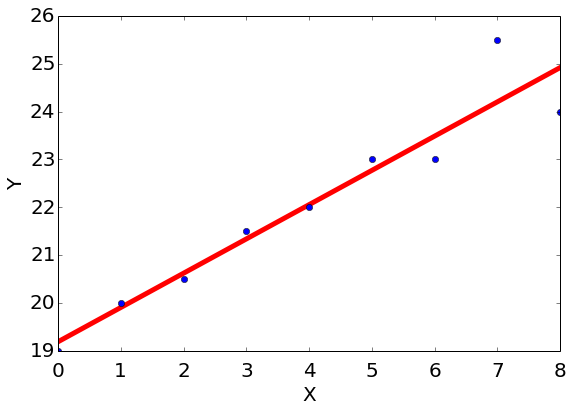

In [2]:
import scipy, scipy.stats

# a few data points
X = [0,1,2,3,4,5,6,7,8]
Y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

# let's fit a line:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X,Y)
#                 ^^^^^^^  ^^^^^^^  ^^^^^^^ ?

print "    slope =", slope
print "intercept =", intercept

# Here's our function:
line = [ slope*xi + intercept for xi in X]

# plot it up
plt.plot(X,line,'r-', linewidth=5)
plt.plot(X,Y,'o')
plt.xlabel("X"); plt.ylabel("Y"); plt.show()

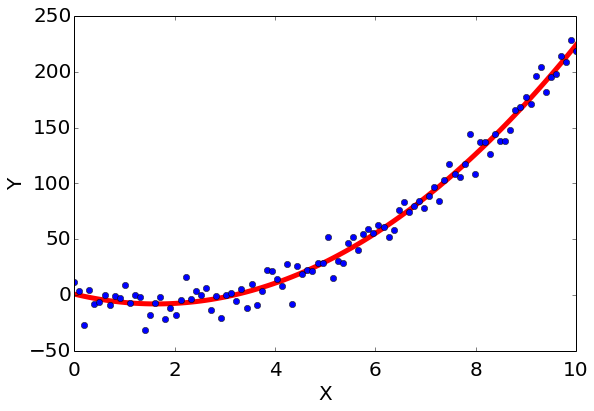

In [3]:
def f_poly(x):
    return 3.4*x**2 - 12*x + 2.45768

X = np.linspace(0,10,100)
Y = [f_poly(x) + 10*np.random.randn() for x in X]

# get the best fit parameters:
beta1,beta2,beta3 = np.polyfit(X,Y, 2) # <-- 2 means quadratic

# generate and draw the line:
line = [beta1*x**2 + beta2*x + beta3 for x in X]

plt.plot(X,line,'r-', linewidth=5)
plt.plot(X,Y,'o')
plt.xlabel("X"); plt.ylabel("Y"); plt.show()

## Nonlinear least-squares regression

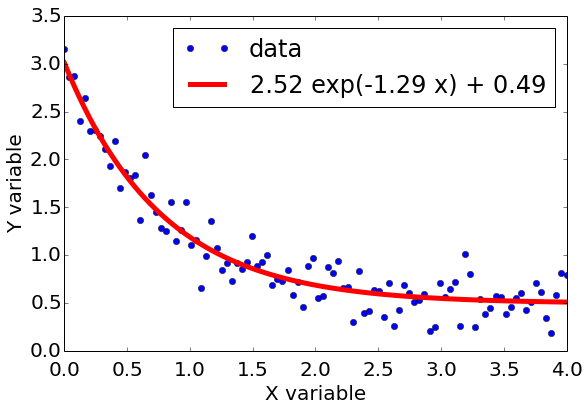

In [4]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    """Our little nonlinear function."""
    return a*np.exp(-b*x) + c


# our measured data with noise:
X = np.linspace(0,4,100)
Y = func(X, 2.5, 1.3, 0.5) + 0.2*np.random.normal(size=len(X))

# nonlinear fitting!!!!!!!!!
betasEXP, cov = curve_fit(func, X, Y)
#         ^^^ ?

plt.plot(X,Y, 'o')
plt.plot(X, func(X, *betasEXP), 'r-', linewidth=5)
plt.xlabel("X variable"); plt.ylabel("Y variable")
lstrEXP = "%0.2f exp(-%0.2f x) + %0.2f" % tuple(betasEXP)
plt.legend(["data", lstrEXP]); 
plt.show()


## Comparing models

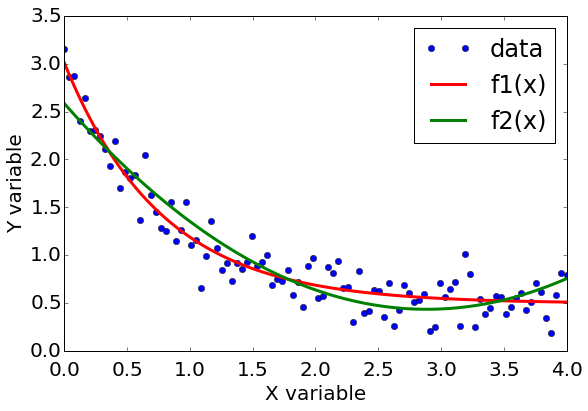

In [5]:
def func2(x, a, b, c):
    return a*x**2 + b*x + c

# do the fit with nonlinear regression, but we could also use
# polyfit:
betasPLY, pcov = curve_fit(func2, X, Y)

plt.plot(X,Y, 'o')
plt.plot(X,  func(X, *betasEXP), 'r-', linewidth=3)
plt.plot(X, func2(X, *betasPLY), 'g-', linewidth=3)
plt.xlabel("X variable"); plt.ylabel("Y variable")
plt.legend(["data", "f1(x)", "f2(x)"]); plt.show()

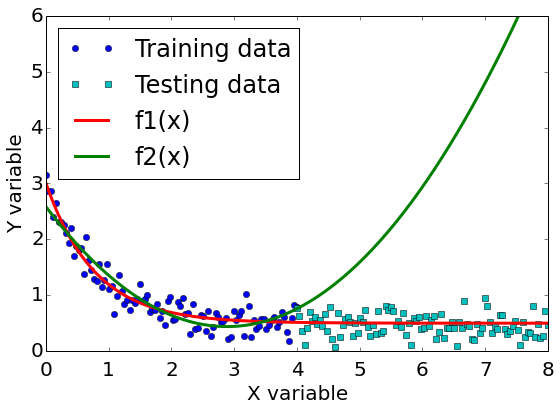

In [6]:
# recycling fits from previous cells:

Xtest = np.linspace(4,8,100)
Ytest = func(Xtest, 2.5, 1.3, 0.5) + 0.2*np.random.normal(size=len(X))

Xall = np.append(X, Xtest)

# plot data:
plt.plot(X,Y, 'o')
plt.plot(Xtest,Ytest, 'sc')

# plot fits:
plt.plot(Xall,  func(Xall, *betasEXP), 'r-', linewidth=3)
plt.plot(Xall, func2(Xall, *betasPLY), 'g-', linewidth=3)

# clean it up a bit:
plt.xlabel("X variable"); plt.ylabel("Y variable")
plt.legend(["Training data", "Testing data", "f1(x)", "f2(x)"], 'upper left')
plt.ylim([0, 6]);plt.show()


***

# Quantifying the fit

We want a **number** measuring how good the curve is to the data. Is it plausible that the data come from our equation (with some noise), or is there probably no connection.

* We can also use this quantify if $x$ and $y$ are related or independent. This is known as "correlation"":


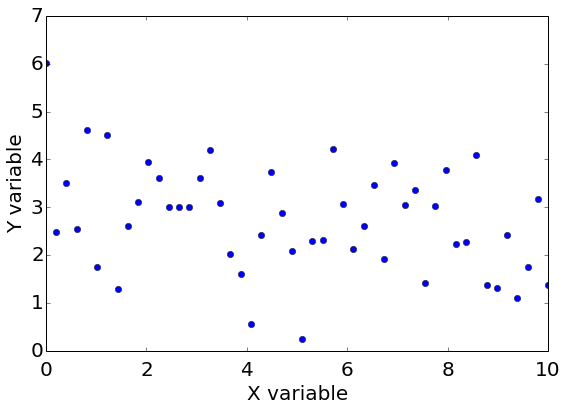

In [7]:
X = np.linspace(0,10,50)
Y = [np.random.randn()+3 for x in X] # no relationship to x:

plt.plot(X,Y, 'o')
plt.xlabel("X variable"); plt.ylabel("Y variable")
plt.show()

There are many ways to measure this. A common way is the **correlation coefficient** $R$. In this context we want to measure $R^2$, aka the coefficient of determination.

* $R^2$ is a number between 0 and 1 that tells us how strongly x is related to y. If $R^2 = 1$ the relationship is perfect; if $R^2 = 0$ there is no relationship!

<br>
Here is the intuition behind $R^2$, illustrated for a simple line:


If there is no relationship then we know our equation for $y$, $y=f(x)$, will **not contain** $x$. This must be $y = \beta_1$, a constant. And the $\beta_1$ that minimizes the error for this function is just the average of all the $y_i$, denoted $\bar{y}$.

***
The $R^2$ is a number that lets us measure how much better our linear function is from the constant function. How much better is our linear function from the independent function.
***

To make this comparison we need to compute the sum of the squared errors for the linear function $y = f(x)$ and the constant function $y = \bar{y}$ :

$$S_\mathrm{linear}   = \sum_i \left(y_i - f(x_i)\right)^2$$

$$S_\mathrm{constant} = \sum_i \left(y_i - \bar{y}\right)^2$$


If the linear fit is great, and the constant "fit" is bad, then $S_\mathrm{linear} \ll S_\mathrm{constant}$.

<br><br><br>
Wikipedia [provides a great picture](https://en.wikipedia.org/wiki/Coefficient_of_determination):

<img width=700 src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg">


The boxes illustrate the squared errors as *areas*.


Then the $R^2$ is just:

$$ R^2 = 1 - \frac{\color{blue}{S_\mathrm{linear}} }{\color{red}{S_\mathrm{constant}}}$$

<br>

How to compute this in python? For linear regression we can use `scipy`. Here's some examples:


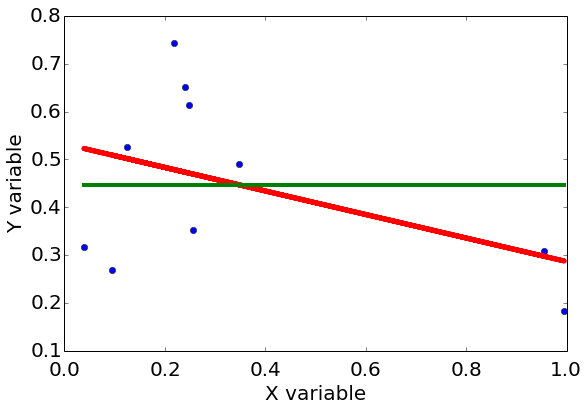

R^2 = 0.202302540126


In [8]:
# fake data!
x = np.random.random(10)
y = np.random.random(10)

ybar = np.mean(y)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
#                 ^^^^^^^

plt.plot(x,y,'o')
plt.plot(x, slope*x + intercept, 'r-', linewidth=5) 
plt.plot([min(x),max(x)],[ybar,ybar], linewidth=4)
plt.xlabel("X variable"); plt.ylabel("Y variable"); plt.show()

print "R^2 =", r_value**2


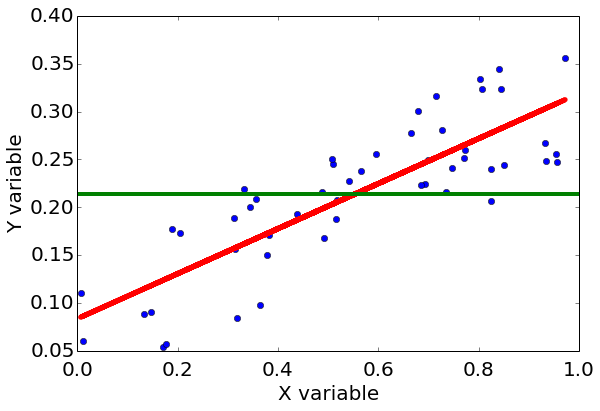

R^2 = 0.69039551242


In [9]:
# more fake data!
x = np.random.random(50)
y = 0.24*x + np.random.random(50)*0.15
#   ^^^^

ybar = np.mean(y)


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

plt.plot(x,y,'o')
plt.plot(x, slope*x + intercept, 'r-', linewidth=5) 
plt.plot([0,1],[ybar,ybar], linewidth=4)
plt.xlabel("X variable"); plt.ylabel("Y variable"); plt.show()

print "R^2 =", r_value**2

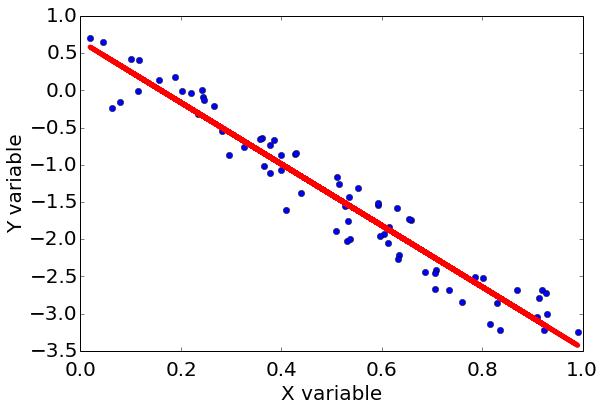

R^2 = 0.936385183565


In [10]:
# more fake data!
x = np.random.random(70)
y = -4*x + np.random.random(70)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

plt.plot(x,y,'o')
plt.plot(x, slope*x + intercept, 'r-', linewidth=5) 
plt.xlabel("X variable"); plt.ylabel("Y variable"); plt.show()

print "R^2 =", r_value**2

<br>
***

The $R^2$ should be small when there's no relationship, but with only 10 points it may appear **by chance**!

* Let's repeat the first example with **many** random datasets and see how $R^2$ is distributed:

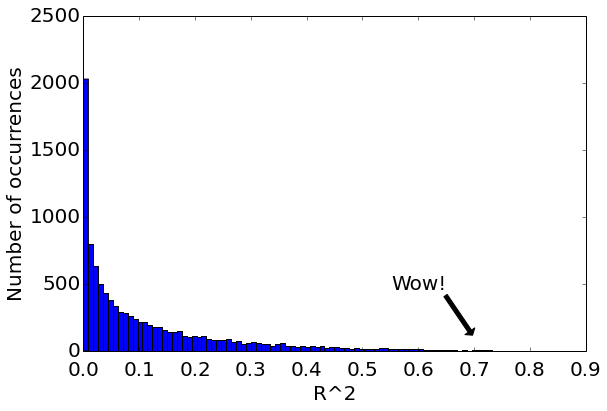

In [11]:
list_Rs = []
for _ in range(10000):
    x = np.random.random(10)
    y = np.random.random(10)

    slope, intercept, r_value, px, serr = scipy.stats.linregress(x,y)
    
    list_Rs.append(r_value**2)

plt.hold(True)
plt.hist(list_Rs,100)

plt.annotate('Wow!', xy=(0.7, 100), xytext=(0.6, 500),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha="center", va="center",
            )


plt.xlabel("R^2"); plt.ylabel("Number of occurrences"); plt.show()

**Question**: Why is it called $R^2$?

### Correlation coefficient


Given a dataset consisting of XY-data, we can compute a number $r$ by comparing the $x_i$'s and the $y_i$'s to their means $\bar{x}$ and $\bar{y}$:

$$r = \frac{\sum^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum^n _{i=1}(y_i - \bar{y})^2}}$$

This is known as the correlation coefficient or the Pearson correlation coefficient or the Pearson product-moment correlation coefficient. 

* It measures how linearly correlated $y$ is to $x$. (This is also known as *dependence*.)

* It can be positive or negative.

Some examples:

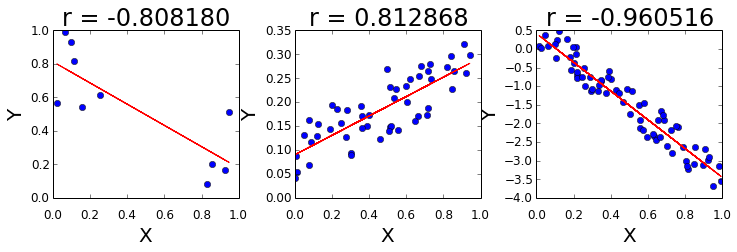

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
#plt.subplots_adjust(left=0.2, right=0.6, top=1, bottom=0)
plt.subplots_adjust(wspace=0.3)

### RANDOM ###
x = np.random.random(10)
y = np.random.random(10)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
ax1.plot(x,y,'o', x, slope*x+intercept, 'r-')
ax1.set_xlabel("X"); ax1.set_ylabel("Y")
ax1.set_title("r = %f" % r_value)


### SOME LINEAR DEPENDENCE ###
x = np.random.random(50)
y = 0.24*x + np.random.random(50)*0.15

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
ax2.plot(x,y,'o', x, slope*x+intercept, 'r-')
ax2.set_xlabel("X"); ax2.set_ylabel("Y")
ax2.set_title("r = %f" % r_value)


### SOME LINEAR DEPENDENCE ###
x = np.random.random(70)
y = -4*x + np.random.random(70)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
ax3.plot(x,y,'o', x, slope*x+intercept, 'r-')
ax3.set_xlabel("X"); ax3.set_ylabel("Y")
ax3.set_title("r = %f" % r_value); 


for ax in [ax1,ax2,ax3]:
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
plt.show()

Our original question:

These two equations look very different:

$$ R^2 = 1 - \frac{\sum_i \left(y_i - f(x_i)\right)^2}{\sum_i \left(y_i - \bar{y}\right)^2} ~~~~~~~ \mbox{(where $f(x)$ is a line)}$$ 

vs.


$$r = \frac{\sum^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum^n _{i=1}(y_i - \bar{y})^2}}$$




But it can be shown that squaring the correlation coefficient gives us the coefficient of determination ($r^2 = R^2$). 


***

More examples and gotchas.

$r^2$ can be interpreted by how much variance (the fraction of variance) in $y$ is explained by a **linear function** of $x$.

Few data are exactly explained by a linear function, but we can always compute the $r^2$ value given the $(x_i,y_i)$ pairs.

<br>

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet):
<img width=700
src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg">

All four datasets have $r=0.816$!


* **Correlation is sensitive to the data range**:

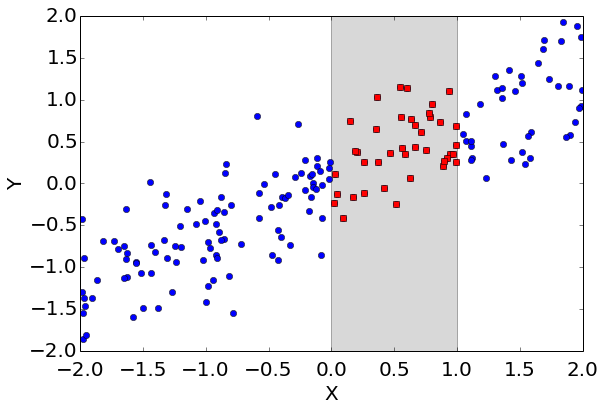

    r (all) = 0.870458448365
r (reduced) = 0.424488413882


In [13]:
X = np.random.random(180)*4 - 2
Y = 0.6*X + np.random.randn(180)*0.4

# reset fig size from prev subplot:
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(9.0, 6.0))
matplotlib.rc('xtick.major', pad=10) # xticks too close to border!


# fit a line to all the data:
m, b, r_all, p, serr = scipy.stats.linregress(X,Y)


# fit a line to a small part of the data (x between 0 and 1):
XY_red = [ (x,y) for x,y in zip(X,Y) if 0.0 < x < 1.0 ]
Xr,Yr = zip(*XY_red)

m, b, r_red, p, serr = scipy.stats.linregress(Xr,Yr)

plt.plot(X,Y,'o', Xr,Yr,'rs')
plt.fill_between([0,1],[-2,-2],[2,2], facecolor='grey',alpha=0.3)
plt.ylim(-2,2)
plt.xlabel("X");plt.ylabel("Y");plt.show()

print "    r (all) =", r_all
print "r (reduced) =", r_red

# Robustness and confidence of a fit

<div>
<div class="span5 alert alert-danger">
Given a (linear) fit, how much of your result is due to the data itself. Could a single outlier
have tricked you?
</div>

<div class="span5 alert alert-danger">
How far off is our estimated fit parameter $\beta$ from the true value?
</div>

<div class="span5 alert alert-danger">
How can you quantitatively tell that there is **really** a (linear) relationship between $x$ and $y$?
</div>

</div>

* I'll focus on means and linear regression, but the basis of these ideas is much more general


## Bootstrapping

Suppose I've fitted the line $y = m x + b$ to the data. I get a slope of $m = 1.0245$ and I have a good reason to **suspect** (hypothesis!) the system is really follows a function with a slope of 1. Is it right? What if I measured $m = 1.2045$?


<br>

A simple way to answer this is to get a bunch more data, say from 100 experiments, measure $m$ for each one, and make a histogram of all the slopes. If this shows a sharp peak around 1 that supports the hypothesis. If our first measurement was a **fluke** we would see many other experiments with slopes far from 1.

* In real life we often can't get more data!


When faced with this situation we can turn to **resampling** techniques to FAKE more experiments out of our single bag of data.


### Cross-validation

*K-fold cross-validation* Randomly chop the data into $K$ equally-sized subsamples. Perform your analysis (regression in this case) on a sample containing $K-1$ of the subsamples grouped together, holding out the last subsample. Repeat this $K$ times holding out each subsample once. This gives you $K$ values of the slope, in this case.


### Bootstrapping

Here's a clever trick:

You can generate a "new" dataset by sampling randomly from the original data **with replacement**. The same point or value can be drawn more than once! If values are common in the original dataset they will be more likely to be sampled in each **bootstrap** dataset, capturing the underlying population distribution but allowing random variation. This is a little ad hoc.

Here's an example using the mean of a collection of measurements:

In [5]:
mu = 2.5 
measurements = mu + np.random.randn(100)

print("mean =", np.mean(measurements))

mean = 2.62442959569


Let's do 100 bootstrap **replicates** and see how broadly their means are distributed.

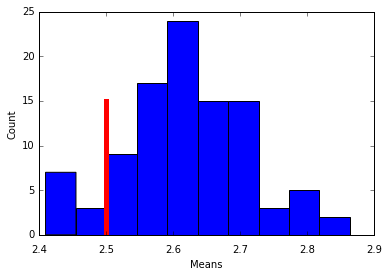

In [10]:
n = len(measurements) # size of dataset

list_bootstrap_means = []
for _ in range(100):
    bs_measurements = [ random.choice(measurements) for _ in range(n) ]
    
    bs_mean = np.mean(bs_measurements)
    list_bootstrap_means.append(bs_mean)

plt.hold(True)
plt.hist(list_bootstrap_means)
plt.plot([mu,mu], [0,15], 'r-', linewidth=5)
plt.xlabel("Means"); plt.ylabel("Count"); plt.show()

Well, it looks like the true value is inside the distribution of means, but are the means in our replicates spread widely?

* Let's do more bootstraps!

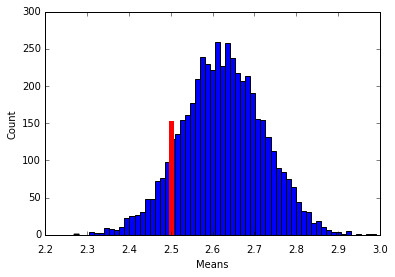

In [11]:
n = len(measurements) # size of dataset

list_bootstrap_means = []
for _ in range(5000):
    bs_measurements = [ random.choice(measurements) for _ in range(n) ]
    
    bs_mean = np.mean(bs_measurements)
    list_bootstrap_means.append(bs_mean)

plt.hold(True)
plt.hist(list_bootstrap_means, 60)
plt.plot([mu,mu], [0,150], 'r-', linewidth=5)
plt.xlabel("Means"); plt.ylabel("Count"); plt.show()

Hmm, it looks like the bootstrap data are obeying a gaussian (normal distribution). We can work out the mean and variance of this distribution:

In [12]:
mean_means = np.mean(list_bootstrap_means)
stdv_means = np.std(list_bootstrap_means)

print("mean, stdv =", mean_means, stdv_means)

print(np.percentile(list_bootstrap_means,5))
print(np.percentile(list_bootstrap_means,95))

mean, stdv = 2.62310231638 0.0981116101948
2.46262361628
2.78513431077


***

Bootstrapping can also be used for XY-data. Return to our original example. 

We've got some XY-data and we've estimated a slope and an intercept for a linear function's fit. 

Can we make a clain about what the *true* slope is, given the slope we got from our data?

1. Bootstrap the XY-pairs
2. Fit each bootstrap dataset to get a slope
3. ??? (actually, histogram)
4. profit

First let's plot the original scatter, and 100 fitted lines for 100 bootstraps:

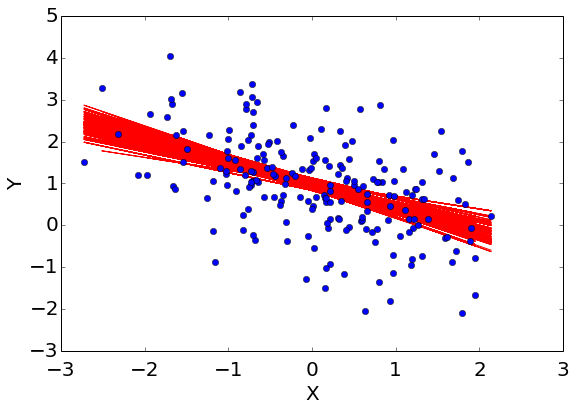

In [18]:
# fake xy data:
a = -0.5
b = 1
n = 200
x = np.random.randn(n)
y = a*x + b + 1*np.random.randn(n)


plt.plot(x,y,'o', zorder=2)
data = zip(x,y)
n = len(data)


list_slopes = []
for _ in range(100):
    sampled_data = [ random.choice(data) for _ in range(n) ]
    x_s,y_s = zip(*sampled_data)
    x_s = np.array(x_s)
    y_s = np.array(y_s)
    
    m_s, b_s, r, p, err = scipy.stats.linregress(x_s,y_s)
    ymodel = m_s*x_s + b_s
    list_slopes.append(m_s)
    
    plt.plot(x_s,ymodel,'r-',zorder=1)

#plt.fill_between(xd, yl,yu, alpha=0.3, facecolor='blue',edgecolor='none',zorder=5)
plt.xlabel("X"); plt.ylabel('Y');plt.show()

It's very interesting that there's a sort of "bow-tie" shape to the different lines. This is due to a non-trivial relationship between the slopes and intercepts.


Here's the distribution of slopes:

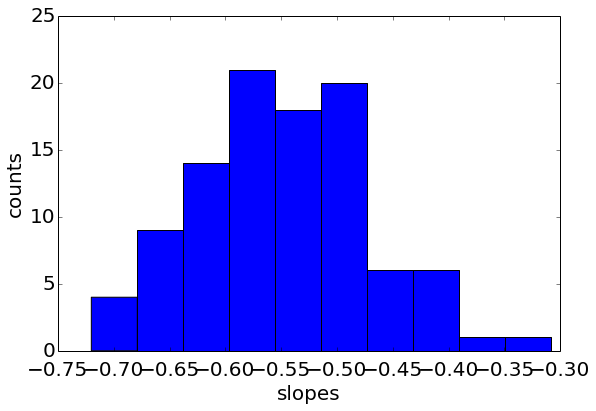

In [19]:
plt.hist(list_slopes)
plt.xlabel("slopes");plt.ylabel("counts");plt.show()

This process let us computationally estimate a **CONFIDENCE INTERVAL** on the slope. 

* It looks like the slope is going to be between $m=-0.7$ and $m=-0.3$

A confidence interval let's us define the range of numbers over which we are, say, 95% confident the true value lies. Another way of thinking about this is that our result (whatever it is) lets us estimate that there is a 95% chance the true value lies in this range.

***

For linear regression we can write down exactly what the confidence intervals are, for the slope, intercept, etc. If we assume errors are normally distributed this is exactly.

* Not only the confidence intervals on the slope ($m \in [m_\mathrm{lower},m_\mathrm{upper}]$), but even on the line itself:

In [20]:
def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = numpy.linspace(xd.min(),xd.max(),100)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*numpy.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x 

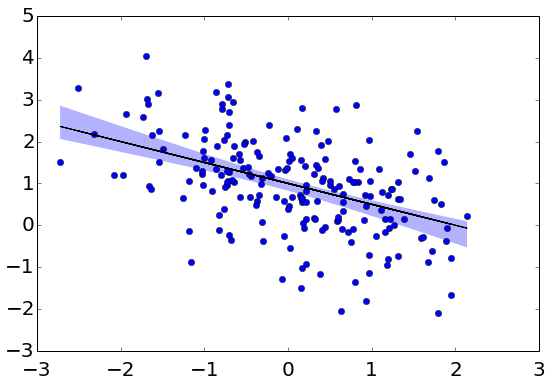

In [21]:
yl,yu,xd = linregress_CIs(x,y)

plt.plot(x,y, 'o')
plt.plot(x,a*x+b,'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()

(The blue area is a 95% confidence interval **on the line**. It does **not** mean that 95% of the data points fall inside the blue area.)

How does this prediction compare to the bootstrap:

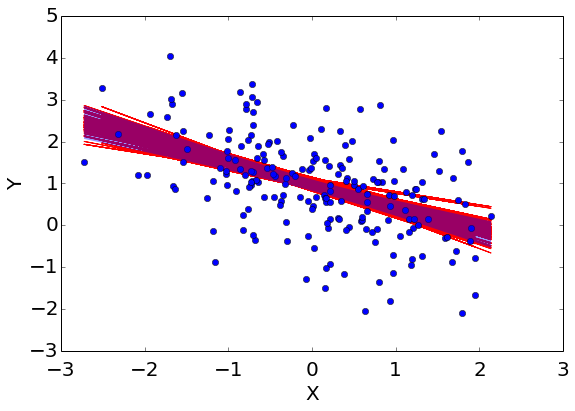

In [22]:
# plot the original data again
plt.plot(x,y,'o', zorder=2)

# plot the bootstrap lines again:
for _ in range(100):
    sampled_data = [ random.choice(data) for _ in range(n) ]
    x_s,y_s = zip(*sampled_data)
    x_s = np.array(x_s)
    y_s = np.array(y_s)
    
    m_s, b_s, r, p, err = scipy.stats.linregress(x_s,y_s)
    ymodel = m_s*x_s + b_s
    
    plt.plot(x_s,ymodel,'r-',zorder=1)

# plot the CI:
plt.fill_between(xd, yl,yu, alpha=0.4, facecolor='blue',edgecolor='none',zorder=5)
plt.xlabel("X"); plt.ylabel('Y');plt.show()

***